# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Crea una red neuronal no convolucional de 3 capas y 32, 32, 64 neuronas respectivamente. Entrénala con los datos desde 1960 hasta 2010. Usa los datos desde 2010 hasta 2014 para predecir la columna "Murder" (y). ¿Se aproxima al número real?
3. Ahora, prueba 3 optimizadores diferentes, ¿se modifica el resultado? ¿cuál te ha dado mejores resultados? 
4. Con el mejor optimizador modifica la función de activación a otra diferente. ¿Cuál ha dado mejor resultado?
5. Ahora, haz que la red tenga 7 capas con 17,9,4,16,4,4,4 neuronas respectivamente. Utiliza la mejor función de activación y el mejor optimizador. ¿Esta red da mejor resultado? (Si da problema de memoria, prueba a quitar capas.)
6. Por último, genera una red convolucional con 2 capas convolucionales sin MaxPool, ¿es mejor esta red que las anteriores? Prueba a cambiar la función de activación y el optimizador. ¿Se ha mejorado el resultado? ¿Cuál es mejor?
7. ¿Qué crees que pasaría si entrenamos la red hasta el año 2000 y predecimos desde el 2000 hasta el 2014? (Bonus: realiza el mismo proceso de los ejercicios 2-6 pero entrenando solo hasta el año 2000)

In [82]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import pathlib
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


&lt;AxesSubplot:xlabel=&#39;Year&#39;&gt;

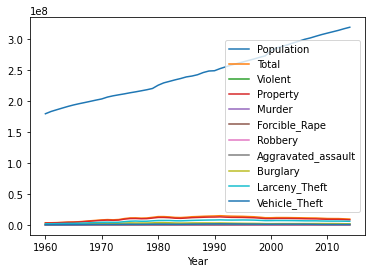

In [41]:
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")


df.set_index("Year", inplace=True)
df.plot()

In [42]:
df_train = df.loc[1960:2010]
df_text = df.loc[2011:2014]

In [43]:
df_text

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
2011,311587816,10258774,1206031,9052743,14661,84175,354772,752423,2185140,6151095,716508
2012,313873685,10219059,1217067,9001992,14866,85141,355051,762009,2109932,6168874,723186
2013,316497531,9850445,1199684,8650761,14319,82109,345095,726575,1931835,6018632,700294
2014,318857056,9475816,1197987,8277829,14249,84041,325802,741291,1729806,5858496,689527


Dos supuestos en función como se separen los set de train y de test:

    1. Train sera solo Year y el target Murder
    2. Train estará formado por todos los datos menos Murder que es el target

In [102]:
# El target es común para ambos supuestos
y_train = df_train.Murder.values
y_test = df_text.Murder.values

Para el supuesto 1 (variable predictora X formado unicamente por Year)

In [101]:
X_train_1 = df_train.index.values
X_test_1 = df_text.index.values

Para el supuesto 2 (variable predictora X, formada por todo el df excepto el target)

In [46]:
df2 = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

In [47]:
# Quito el target de este df1
df2.drop(['Murder'], axis=1, inplace=True)

In [48]:
df2.tail()

,Year,Population,Total,Violent,Property,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
50,2010,309330219,10363873,1251248,9112625,85593,369089,781844,2168457,6204601,739565
51,2011,311587816,10258774,1206031,9052743,84175,354772,752423,2185140,6151095,716508
52,2012,313873685,10219059,1217067,9001992,85141,355051,762009,2109932,6168874,723186
53,2013,316497531,9850445,1199684,8650761,82109,345095,726575,1931835,6018632,700294
54,2014,318857056,9475816,1197987,8277829,84041,325802,741291,1729806,5858496,689527


In [54]:
# Normalizo el df. Como el target es el index, al normalizar el dataframe no se verá afectado
scaler = MinMaxScaler()
df2_normalizaded = scaler.fit_transform(df)

In [64]:
df2_normalizaded.shape

(55, 11)

In [68]:
df2_normalizaded = pd.DataFrame(df2_normalizaded)
#transformed_iris["species"] = iris["species"]
df2_normalizaded.columns = df2.columns

In [76]:
df2_normalizaded.head()

,Year,Population,Total,Violent,Property,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,0.000000,0.000000,0.000000,0.000000,0.035869,0.000000,0.002014,0.000000,0.000000,0.000000,0.000000
1,0.026293,0.009035,0.000566,0.010430,0.012987,0.000327,0.000000,0.002487,0.013007,0.009162,0.005849
2,0.046210,0.032031,0.007939,0.035984,0.000000,0.003919,0.007211,0.010445,0.028511,0.037253,0.028946
3,0.065646,0.063132,0.017344,0.070631,0.006803,0.005007,0.016866,0.020269,0.060456,0.070370,0.060067
4,0.084695,0.102744,0.046088,0.111977,0.051330,0.046043,0.040822,0.049659,0.104436,0.104823,0.108436


In [71]:
df2_train_normalizaded = df2_normalizaded.loc[:50]
df2_test_normalizaded = df2_normalizaded.loc[51:]

In [79]:
len(df2_train_normalizaded.keys())

11

In [100]:
X_train2 = df2_train_normalizaded.values
X_test2 = df2_test_normalizaded.values

In [97]:
X_train2.head()

,Year,Population,Total,Violent,Property,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,0.000000,0.000000,0.000000,0.000000,0.035869,0.000000,0.002014,0.000000,0.000000,0.000000,0.000000
1,0.026293,0.009035,0.000566,0.010430,0.012987,0.000327,0.000000,0.002487,0.013007,0.009162,0.005849
2,0.046210,0.032031,0.007939,0.035984,0.000000,0.003919,0.007211,0.010445,0.028511,0.037253,0.028946
3,0.065646,0.063132,0.017344,0.070631,0.006803,0.005007,0.016866,0.020269,0.060456,0.070370,0.060067
4,0.084695,0.102744,0.046088,0.111977,0.051330,0.046043,0.040822,0.049659,0.104436,0.104823,0.108436


In [78]:
print(X_train2.shape)
print(X_test2.shape)

(51, 11)
(4, 11)


2. Crea una red neuronal no convolucional de 3 capas y 32, 32, 64 neuronas respectivamente. Entrénala con los datos desde 1960 hasta 2010. Usa los datos desde 2010 hasta 2014 para predecir la columna "Murder" (y). ¿Se aproxima al número real?

Lo calculo para el target Murder y las variables el resto de columnas del dataframe

In [80]:
def build_model():
  model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[len(df2_train_normalizaded.keys())]),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [83]:
model = build_model()

Con el summary muestro una descripción simple del modelo

In [84]:
model.summary()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________


Entreno el modelo

In [103]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  X_train2, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [104]:
# Veo las estadisticas del entrenamiento por cada epoch(1000) utilizando el objeto history
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,42736.460938,170.477417,42736.460938,96976.273438,289.311340,96976.273438,995
996,40042.898438,173.386673,40042.898438,73465.226562,244.683777,73465.226562,996
997,42115.082031,171.836334,42115.082031,132535.406250,346.002747,132535.406250,997
998,36458.945312,163.555008,36458.945312,40556.695312,162.340195,40556.695312,998
999,74133.562500,218.567780,74133.562500,69013.945312,235.375183,69013.945312,999


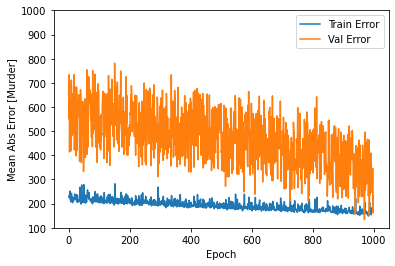

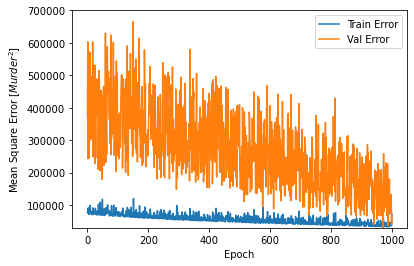

In [112]:
# Función para imprimir el error de validación y de entrenamiento.abs
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Murder]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([100,1000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Murder^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([30000,700000])
  plt.legend()
  plt.show()


plot_history(history)

## Sin utilizar las funciones